In [2]:
import logging
import sys
from pathlib import Path


logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s: %(message)s",
    force=True,
)

logger = logging.getLogger(__name__)

# Add the src directory to the Python path
sys.path.append(str(Path.cwd().parent.parent))

In [6]:
from src.models.mlp import FCLayerParams, MLPParams, MLPEvaluator
from src.models.quant.enums import ActivationModule, QMode

from src.datasets.vertebral_dataset import VertebralDataset
from src.datasets.cardio_dataset import CardioDataset
from src.datasets.breast_cancer_dataset import BreastCancerDataset

In [4]:
import torch
from src.models.quant.ternarize import Binarize, Ternarize

dummy_input = torch.tensor([[1.0, 2.0, -2.0], [90.0, 0.0, -110.9]])
Binarize(dummy_input), Ternarize(dummy_input)

(tensor([[   1.6667,    1.6667,   -1.6667],
         [ 100.4500, -100.4500, -100.4500]]),
 tensor([[   0.0000,    2.0000,   -2.0000],
         [ 100.4500,    0.0000, -100.4500]]))

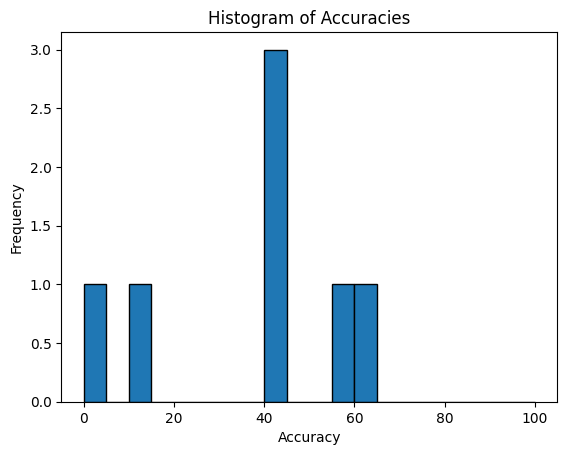

In [10]:
from matplotlib import pyplot as plt


def hist_accuracies(accuracies: list[float], bins=20) -> plt.Figure:
    fig, ax = plt.subplots()
    ax.hist(accuracies, bins=bins, range=(0, 100), edgecolor="black")
    ax.set_title("Histogram of Accuracies")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Frequency")
    return fig


fig = hist_accuracies([1, 14, 43, 63, 44, 44, 56])

In [ ]:
from src.main import ActivationParams


train_loader, test_loader = CardioDataset.get_dataloaders(batch_size=64)

p = MLPParams(
    layers=[
        FCLayerParams(CardioDataset.input_size, bitwidth=16),
        FCLayerParams(32, bitwidth=16),
        FCLayerParams(16, bitwidth=16),
        FCLayerParams(CardioDataset.output_size, bitwidth=32),
    ],
    learning_rate=0.01,
    activation=ActivationParams(
        activation=ActivationModule.BINARIZE_RESTE,
        binary_quantization_mode=QMode.DET,
    ),
    epochs=30,
    dropout_rate=0.2,
    quantization_mode=QMode.DET,
)

evaluator = MLPEvaluator(train_loader, test_loader)

In [13]:
from src.models.mlp import MLP


MLP(p).summarize_architecture()

[{'index': 0, 'type': 'Module_Quantize', 'details': 'Module_Quantize()'},
 {'index': 1,
  'type': 'Linear',
  'details': 'Linear(in_features=21, out_features=32, bias=True)'},
 {'index': 2,
  'type': 'BatchNorm1d',
  'details': 'BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)'},
 {'index': 3, 'type': 'Module_Quantize', 'details': 'Module_Quantize()'},
 {'index': 4, 'type': 'Dropout', 'details': 'Dropout(p=0.2, inplace=False)'},
 {'index': 5,
  'type': 'Module_Binarize_ReSTE',
  'details': 'Module_Binarize_ReSTE()'},
 {'index': 6,
  'type': 'Linear',
  'details': 'Linear(in_features=32, out_features=16, bias=True)'},
 {'index': 7,
  'type': 'BatchNorm1d',
  'details': 'BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)'},
 {'index': 8, 'type': 'Module_Quantize', 'details': 'Module_Quantize()'},
 {'index': 9, 'type': 'Dropout', 'details': 'Dropout(p=0.2, inplace=False)'},
 {'index': 10,
  'type': 'Module_Binarize_ReSTE',
  'det

([40.610328638497656,
  46.713615023474176,
  42.25352112676056,
  40.84507042253521,
  43.42723004694836,
  44.13145539906103,
  43.89671361502347,
  41.07981220657277,
  42.72300469483568,
  44.83568075117371],
 [42.72300469483568,
  48.12206572769953,
  44.36619718309859,
  42.95774647887324,
  40.140845070422536,
  40.375586854460096,
  40.84507042253521,
  44.13145539906103,
  40.84507042253521,
  43.66197183098591])

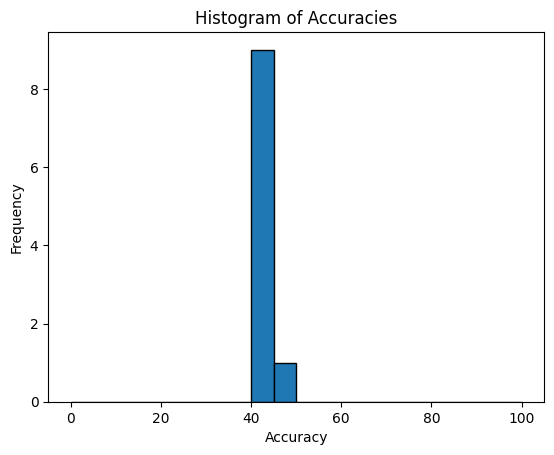

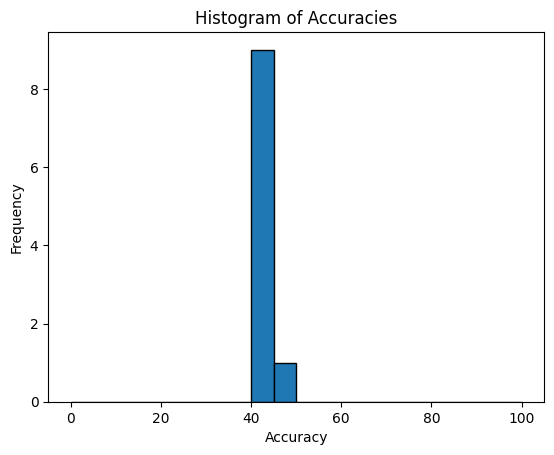

In [7]:
from dataclasses import replace


accuracies = []
for _ in range(10):
    best_acc = evaluator.train_model(p)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)

p2 = replace(p)
p2.layers[-1].bitwidth = 16

accuracies2 = []
for _ in range(10):
    best_acc = evaluator.train_model(p2)
    accuracies2.append(best_acc)

fig = hist_accuracies(accuracies2)

accuracies, accuracies2

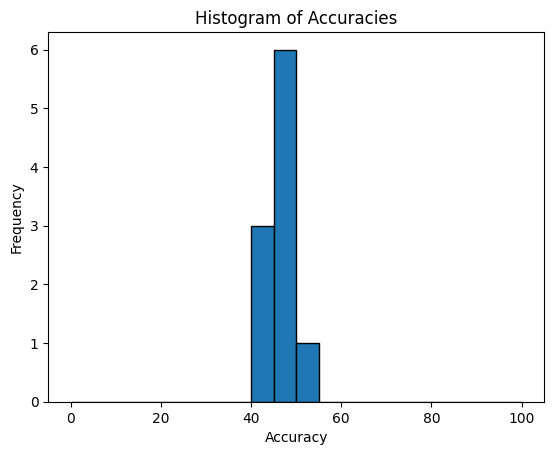

In [8]:
accuracies = []
for _ in range(10):
    best_acc = evaluator.train_model(p)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)

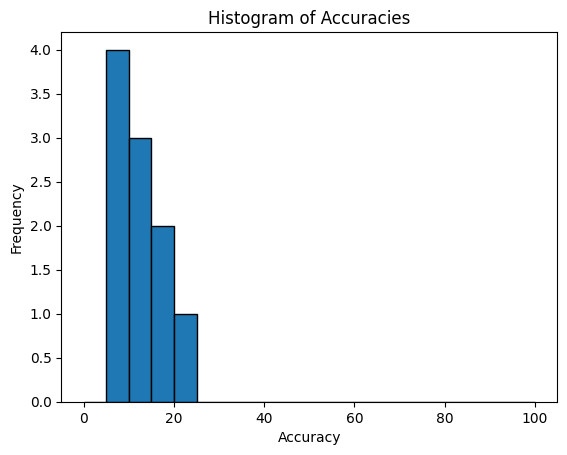

In [5]:
accuracies = []
for _ in range(10):
    best_acc = evaluator.train_model(p)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)

[42.48826291079812,
 41.31455399061033,
 42.25352112676056,
 42.72300469483568,
 46.948356807511736,
 40.610328638497656,
 39.671361502347416,
 41.54929577464789,
 42.72300469483568,
 47.652582159624416,
 48.12206572769953,
 42.95774647887324,
 41.54929577464789,
 42.01877934272301,
 46.009389671361504,
 41.54929577464789,
 42.01877934272301,
 41.31455399061033,
 44.36619718309859,
 44.83568075117371,
 46.009389671361504,
 39.201877934272304,
 46.948356807511736,
 43.89671361502347,
 41.54929577464789,
 40.84507042253521,
 42.48826291079812,
 42.01877934272301,
 44.60093896713615,
 45.305164319248824,
 40.375586854460096,
 43.1924882629108,
 46.244131455399064,
 42.25352112676056,
 42.01877934272301,
 43.66197183098591,
 45.539906103286384,
 44.36619718309859,
 45.070422535211264,
 42.25352112676056,
 41.54929577464789,
 46.244131455399064,
 42.48826291079812,
 46.478873239436616,
 41.07981220657277,
 42.48826291079812,
 38.967136150234744,
 44.60093896713615,
 45.070422535211264,
 42.

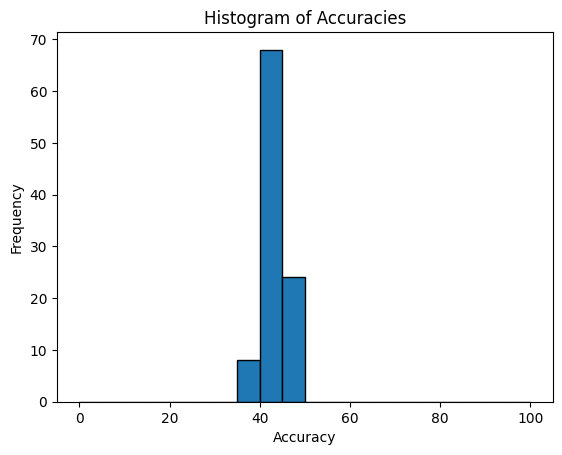

In [ ]:
reste_params = replace(p)
reste_params.activation.activation = ActivationModule.BINARIZE

accuracies = []
for _ in range(100):
    best_acc = evaluator.train_model(reste_params)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)
accuracies

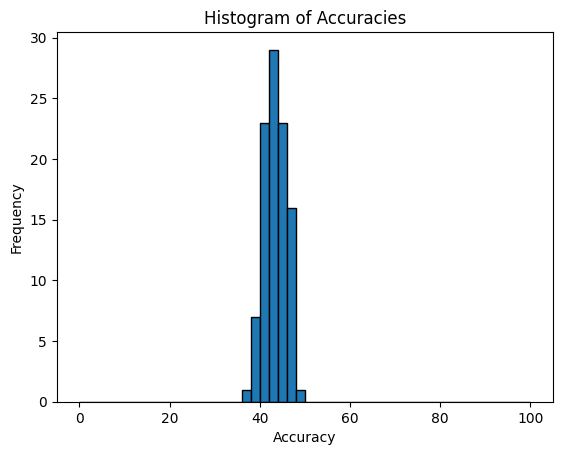

In [42]:
fig = hist_accuracies(accuracies, bins=50)

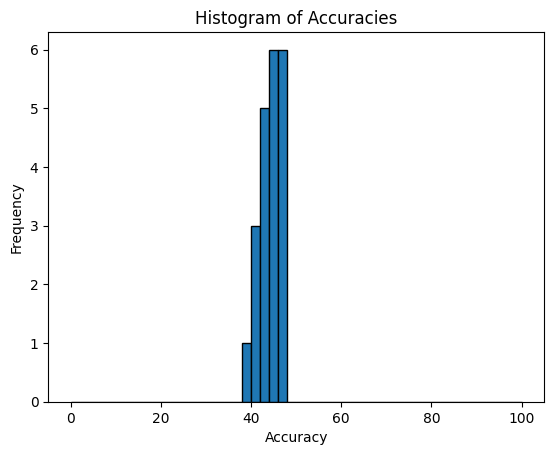

In [82]:
import random


offset = random.randint(0, 80)
fig = hist_accuracies(accuracies[offset:offset+20+1], bins=50)

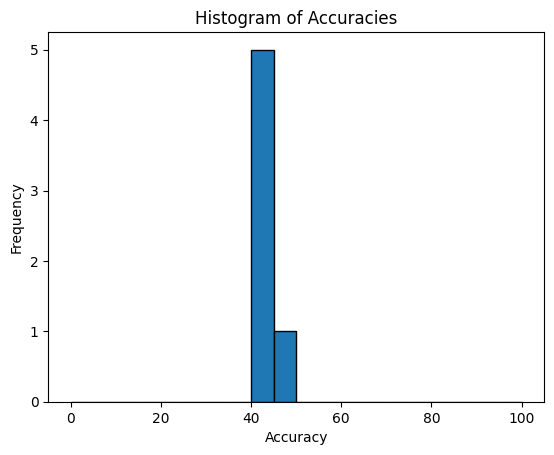

In [10]:
fig = hist_accuracies(accuracies[0:5+1])

[46.713615023474176,
 40.84507042253521,
 47.88732394366197,
 41.07981220657277,
 41.78403755868545,
 40.84507042253521,
 46.009389671361504,
 43.89671361502347,
 46.948356807511736,
 41.31455399061033,
 41.31455399061033,
 41.54929577464789,
 42.95774647887324,
 44.83568075117371,
 41.07981220657277,
 38.732394366197184,
 42.72300469483568,
 43.42723004694836,
 44.60093896713615,
 41.78403755868545]

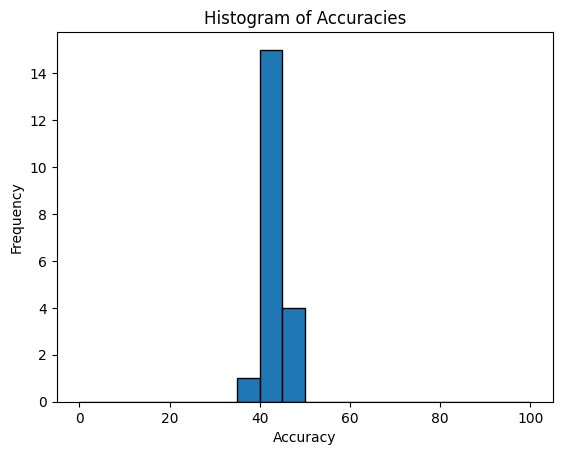

In [ ]:
from dataclasses import replace

reste_params = replace(p)
reste_params.activation.activation = ActivationModule.BINARIZE_RESTE

accuracies = []
for _ in range(20):
    best_acc = evaluator.train_model(reste_params)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)
accuracies

[39.671361502347416,
 47.417840375586856,
 39.436619718309856,
 47.88732394366197,
 43.66197183098591,
 41.78403755868545,
 46.009389671361504,
 39.201877934272304,
 41.78403755868545,
 41.78403755868545,
 39.436619718309856,
 40.375586854460096,
 42.48826291079812,
 48.35680751173709,
 43.42723004694836,
 46.244131455399064,
 44.13145539906103,
 42.25352112676056,
 49.76525821596244,
 44.13145539906103]

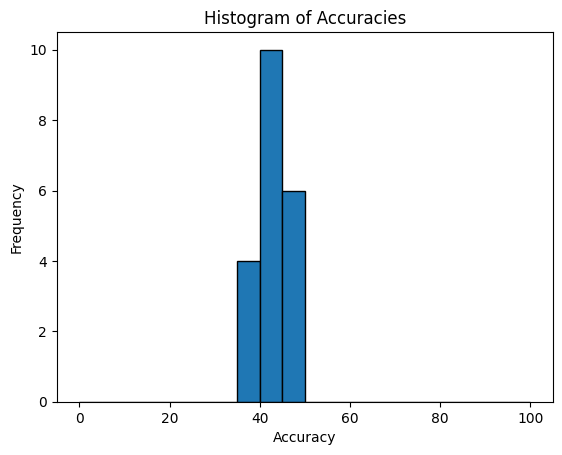

In [ ]:
reste_params.activation.reste_threshold = 1.5
reste_params.activation.reste_o = 3.0

accuracies = []
for _ in range(20):
    best_acc = evaluator.train_model(reste_params)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)
accuracies

[45.070422535211264,
 43.66197183098591,
 48.12206572769953,
 45.539906103286384,
 44.60093896713615,
 45.305164319248824,
 43.66197183098591,
 41.54929577464789,
 40.84507042253521,
 43.66197183098591,
 42.72300469483568,
 44.83568075117371,
 42.48826291079812,
 43.89671361502347,
 43.1924882629108,
 42.48826291079812,
 41.07981220657277,
 42.72300469483568,
 40.140845070422536,
 40.84507042253521]

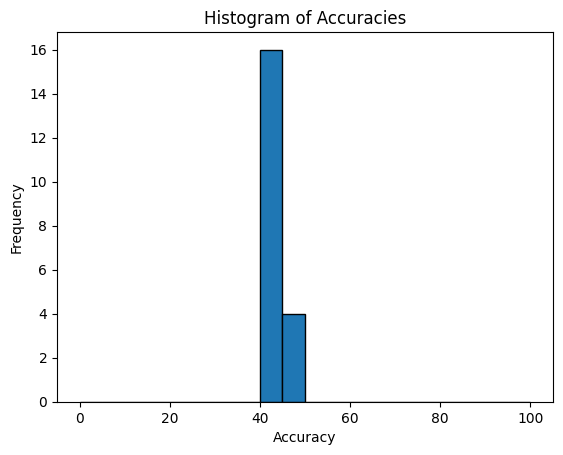

In [ ]:
reste_params.activation.reste_threshold = 3.0
reste_params.activation.reste_o = 3.0

accuracies = []
for _ in range(20):
    best_acc = evaluator.train_model(reste_params)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)
accuracies

In [8]:
l1 = [46.713615023474176,
 40.84507042253521,
 47.88732394366197,
 41.07981220657277,
 41.78403755868545,
 40.84507042253521,
 46.009389671361504,
 43.89671361502347,
 46.948356807511736,
 41.31455399061033,
 41.31455399061033,
 41.54929577464789,
 42.95774647887324,
 44.83568075117371,
 41.07981220657277,
 38.732394366197184,
 42.72300469483568,
 43.42723004694836,
 44.60093896713615,
 41.78403755868545]
l2 = [39.671361502347416,
 47.417840375586856,
 39.436619718309856,
 47.88732394366197,
 43.66197183098591,
 41.78403755868545,
 46.009389671361504,
 39.201877934272304,
 41.78403755868545,
 41.78403755868545,
 39.436619718309856,
 40.375586854460096,
 42.48826291079812,
 48.35680751173709,
 43.42723004694836,
 46.244131455399064,
 44.13145539906103,
 42.25352112676056,
 49.76525821596244,
 44.13145539906103]
l3 = accuracies


In [11]:
import numpy as np


(max(l1), np.mean(l1), np.std(l1)), (max(l2),np.mean(l2), np.std(l2)), (max(l3),np.mean(l3), np.std(l3))

((47.88732394366197,
  np.float64(43.01643192488263),
  np.float64(2.3972124756148347)),
 (49.76525821596244,
  np.float64(43.462441314553985),
  np.float64(3.157495149277752)),
 (48.12206572769953,
  np.float64(43.321596244131456),
  np.float64(1.900502595324753)))

In [12]:
from src.datasets.mnist_dataset import MiniMNISTDataset
from src.models.cnn import ConvLayerParams, CNNParams
from src.models.nn import ActivationParams

DatasetClass = MiniMNISTDataset

# TODO: -1 means that they are unused and are redundant. I'll probably need to get rid of them.
fc_params = MLPParams(
    layers=[
        FCLayerParams(DatasetClass.input_size, bitwidth=16),
        FCLayerParams(64, bitwidth=16),
        FCLayerParams(32, bitwidth=16),
        FCLayerParams(16, bitwidth=16),
        FCLayerParams(DatasetClass.output_size, bitwidth=32),
    ],
    activation=ActivationParams(
        activation=ActivationModule.BINARIZE_RESTE,
        reste_o=3,
        reste_threshold=1.5,
        binary_quantization_mode=QMode.DET,
    ),
    epochs=-1,
    learning_rate=-1,
    weight_decay=-1,
    quantization_mode=QMode.DET,
    dropout_rate=0.0,
)
cnn_params = CNNParams(
    epochs=10,
    learning_rate=0.01,
    weight_decay=0.1,
    in_channels=DatasetClass.input_channels,
    in_dimensions=DatasetClass.input_dimensions,
    in_bitwidth=32,
    out_height=-1,
    conv_layers=[
        ConvLayerParams(16, 3, 1, True),
        ConvLayerParams(16, 3, 1, True),
    ],
    activation=ActivationModule.TERNARIZE,
    reste_o=3,
    reste_threshold=1.5,
    quantization_mode=QMode.DET,
    dropout_rate=0.0,
    fc=fc_params,
)

In [13]:
from src.models.cnn import CNN


cnn = CNN(cnn_params)
cnn.inspect_conv_layers()

INFO: Next layer shape: torch.Size([1, 16, 13, 13]), which equates to 2704 inputs
INFO: Next layer shape: torch.Size([1, 16, 5, 5]), which equates to 400 inputs
INFO: FC input size is 400


In [14]:
from src.models.cnn import evaluate_cnn_model


train_loader, test_loader = DatasetClass.get_dataloaders()

evaluate_cnn_model(cnn_params, train_loader, test_loader, verbose=3)

INFO: Train Epoch: 1 [0/4000] Loss: 2.5403
INFO: Train Epoch: 1 [640/4000] Loss: 2.3392
INFO: Train Epoch: 1 [1280/4000] Loss: 2.2566
INFO: Train Epoch: 1 [1920/4000] Loss: 2.1918
INFO: Train Epoch: 1 [2560/4000] Loss: 2.1225
INFO: Train Epoch: 1 [3200/4000] Loss: 2.1369
INFO: Train Epoch: 1 [3840/4000] Loss: 2.1434
INFO: Test batch loss: tensor(2.0942)
INFO: Test batch loss: tensor(2.1419)
INFO: Test batch loss: tensor(2.0817)
INFO: Test batch loss: tensor(2.1753)
INFO: Test batch loss: tensor(2.1925)
INFO: Test batch loss: tensor(2.1501)
INFO: Test batch loss: tensor(2.1933)
INFO: Test set: Average loss: 2.1470, Accuracy: 159/800 (19.88%)

INFO: Train Epoch: 2 [0/4000] Loss: 2.0262


KeyboardInterrupt: 

# Quantization techniques

- Bitwidth quantization
- BNN: Activation func (Using STE for gradients)
- BNN_ReSTE: Activation func (Changing gradients: ReSTE)
- TNN: Activation func (Differentiable?)
- ... Find more?

## How to integrate them

Bitwidth quantization needs:
- Quantization mode (Deterministic, Stochastic)
- Input: Quantize to bits
- Hidden layers: Quantize to bits
- Advanced: Per input quantization
- Advanced: Per layer quantization

BNN needs:
- Quantization mode
- ...

BNN_ReSTE:
- o
- t
- ...


